In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Declaramos las variables que utilizaremos
E = 10
T = 0.5
r = 0.05
sigma = 0.2
S1 = 2
S2 = 16
a = np.log(S1 / E)
b = np.log(S2 / E)
M = 80
Mb = math.trunc(M * (b / -a))
h = (-a) / M
N = 50
k = T / N
alpha = k * (sigma ** 2) / (2 * h ** 2)
alpha

0.4941530891573725

In [3]:
# Definimos los vectores y matrices que usaremos
V = np.zeros((M + Mb + 1, N + 1))
x = np.zeros(M + Mb + 1)

In [4]:
# Aplicamos una transformación
for i in range(M + Mb + 1):
    x[i] = a + (i * h)
    
    
# Calculamos la condición inicial
for i in range(M + Mb + 1):
    V[i, 0] = np.maximum(0, (E - E * np.exp(x[i]))*np.exp(-r * (T)) )
    
    
# Calculamos las condiciones de frontera
for i in range(N + 1):
    V[0, i] = (E - S1) * np.exp(-r * (T - i * k))
    V[-1, i] = 0


# Calculamos el resto de la EDP
for i in range(1, N + 1):
    for j in range(1, M + Mb):
        V[j, i] = alpha * V[j - 1, i - 1] + (1 - 2 * alpha) * V[j, i - 1] + alpha * V[j + 1, i - 1]
        

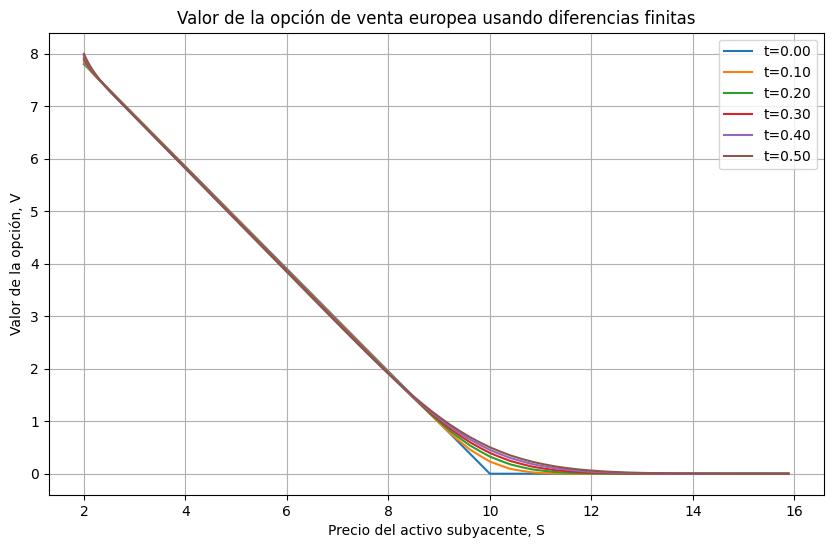

In [5]:
#Printamos la evolucion de la edp
S = E*np.exp(x)
# Graficar los resultados
plt.figure(figsize=(10, 6))
for i in range(0, N+1, int(N/5)):
    plt.plot(S, V[:, i], label=f't={i*k:.2f}')
plt.xlabel('Precio del activo subyacente, S')
plt.ylabel('Valor de la opción, V')
plt.legend()
plt.title('Valor de la opción de venta europea usando diferencias finitas')
plt.grid(True)
plt.show()

In [6]:
#Mostramos los valores cercanos al precio de ejercicio
for i in range(M-10,M+10,2):
    print(S[i],V[i, N])     
        

8.177654339579425 1.7471020882062165
8.513399225207845 1.4587209689128904
8.862928580507484 1.1824152543171742
9.226808345905882 0.9263375159545206
9.605627697295935 0.6982245066344439
9.999999999999998 0.5040654517822347
10.410563801900299 0.3470022059390633
10.83798386734368 0.22682206623338597
11.282952253494754 0.14020763411429413
11.74618943088019 0.0816357126228286


In [8]:
from scipy.stats import norm
import numpy as np

# Parámetros de la opción
E = 10
T = 0.5
r = 0.05
sigma = 0.2
S = np.linspace(S1, S2, M)  # Vector de precios subyacentes

def black_scholes_call(S, E, T, r, sigma):
    d1 = (np.log(S / E) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Cálculo del precio de la opción para cada valor de S
call_prices_bs = black_scholes_call(S, E, T, r, sigma)
call_prices_bs

array([1.07108320e-30, 8.66389800e-28, 3.03107388e-25, 5.29792681e-23,
       5.17464414e-21, 3.08568685e-19, 1.20599926e-17, 3.27281518e-16,
       6.46663701e-15, 9.67692345e-14, 1.13358862e-12, 1.06899585e-11,
       8.31089264e-11, 5.43690355e-10, 3.04620003e-09, 1.48433510e-08,
       6.37519039e-08, 2.44203715e-07, 8.42978926e-07, 2.64654784e-06,
       7.61892421e-06, 2.02595943e-05, 5.00880815e-05, 1.15814252e-04,
       2.51780063e-04, 5.17132016e-04, 1.00785711e-03, 1.87128927e-03,
       3.32203382e-03, 5.65759206e-03, 9.27145956e-03, 1.46612743e-02,
       2.24298052e-02, 3.32772114e-02, 4.79839816e-02, 6.73851251e-02,
       9.23373242e-02, 1.23681678e-01, 1.62205232e-01, 2.08604597e-01,
       2.63454674e-01, 3.27184837e-01, 4.00064049e-01, 4.82195448e-01,
       5.73520015e-01, 6.73828215e-01, 7.82777969e-01, 8.99917019e-01,
       1.02470773e+00, 1.15655247e+00, 1.29481803e+00, 1.43885783e+00,
       1.58803117e+00, 1.74171894e+00, 1.89933574e+00, 2.06033856e+00,
      